In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
shoes_dataset = pd.read_csv('Shoe prices.csv')
#Les données sont chargées à partir du fichier CSV 'Shoe prices.csv' en utilisant pandas.

In [47]:
shoes_dataset.info()
#Les informations sur le DataFrame sont affichées à l'aide de la méthode info().

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        1006 non-null   object
 1   Model        1006 non-null   object
 2   Type         1006 non-null   object
 3   Gender       1006 non-null   object
 4   Size         1006 non-null   object
 5   Color        1006 non-null   object
 6   Material     1006 non-null   object
 7   Price (USD)  1006 non-null   object
dtypes: object(8)
memory usage: 63.0+ KB


In [48]:
shoes_dataset.columns
#Les noms des colonnes sont affichés à l'aide de l'attribut columns.

Index(['Brand', 'Model', 'Type', 'Gender', 'Size', 'Color', 'Material',
       'Price (USD)'],
      dtype='object')

In [49]:
shoes_dataset.isnull().sum()
#On utilise la méthode isnull().sum() pour compter les valeurs manquantes dans chaque colonne.

Brand          0
Model          0
Type           0
Gender         0
Size           0
Color          0
Material       0
Price (USD)    0
dtype: int64

In [50]:
shoes_dataset.describe()
#La méthode 'describe()' donne les statistiques suivantes :

# "count" : Nombre total d'observations non nulles dans une colonne.
# "unique" : Nombre de valeurs uniques dans une colonne.
# "top" : La valeur la plus fréquente dans une colonne.
# "freq" : Le nombre d'occurrences de la valeur la plus fréquente dans une colonne.

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
count,1006,1006,1006,1006,1006,1006,1006,1006
unique,10,239,18,2,13,82,34,33
top,Nike,Sk8-Hi,Running,Men,US 8.5,Black,Mesh,$65.00
freq,118,39,332,535,132,178,308,121


In [51]:
shoes_dataset.shape
#La forme du DataFrame est (1006, 273), ce qui signifie qu'il y a 1006 lignes et 273 colonnes dans le DataFrame.

(1006, 8)

In [52]:
shoes_dataset.sample(4)
#Affichetr un échantillon aléatoire de 4 lignes .

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
787,Converse,Jack Purcell,Casual,Women,US 8.5,Navy,Canvas,$75.00
48,Fila,Original Fitness,Casual,Men,US 11,White/Navy,Leather,$70.00
400,Vans,Slip-On,Skate,Women,US 8,Black/White,Canvas,$50.00
904,Asics,Gel-Kayano 27,Running,Men,US 10,Black,Mesh/Synthetic,$160.00


In [55]:
shoes_dataset = shoes_dataset.drop('Model', axis=1)

#Cette ligne de code supprime la colonne "Model" du DataFrame `shoe_dataset`.
#La méthode `drop()` est utilisée avec l'argument `axis=1` pour indiquer que la suppression doit être effectuée le long de l'axe des colonnes.
#Après cette opération, le DataFrame `shoe_dataset` ne contiendra plus la colonne "Model".

In [56]:
shoes_dataset.head()
#Après avoir supprimé la colonne "Model" du DataFrame , l'appel à 'shoes_dataset.head()' affichera les 
#cinq premières lignes du DataFrame modifié. Cela nous donne un aperçu des données restantes après la suppression de la colonne "Model".

,Brand,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Basketball,Men,US 10,Red/Black,Leather,$170.00
1,Adidas,Running,Men,US 9.5,Black,Primeknit,$180.00
2,Reebok,Casual,Men,US 11,White,Leather,$75.00
3,Converse,Casual,Women,US 8,Navy,Canvas,$55.00
4,Puma,Lifestyle,Women,US 7.5,Pink,Mesh,$80.00


In [ ]:
# Brand
shoes_dataset['Brand'].value_counts()
#compter le nombre d'occurrences de chaque valeur dans la colonne 'Brand' du DataFrame 

Brand
Nike           118
Adidas         100
Reebok         100
Converse       100
Puma           100
Vans           100
New Balance    100
Asics          100
Fila            99
Skechers        89
Name: count, dtype: int64

<Axes: xlabel='Brand'>

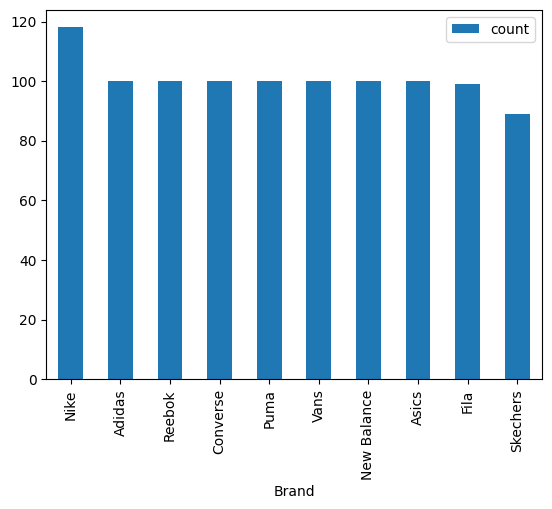

In [ ]:
shoes_dataset['Brand'].value_counts().plot(kind='bar', legend='false')
#génèrer un graphique à barres à partir des comptages de chaque marque dans la colonne 'Brand' du DataFrame 
#Cela permet de visualiser rapidement la distribution des marques dans les données.

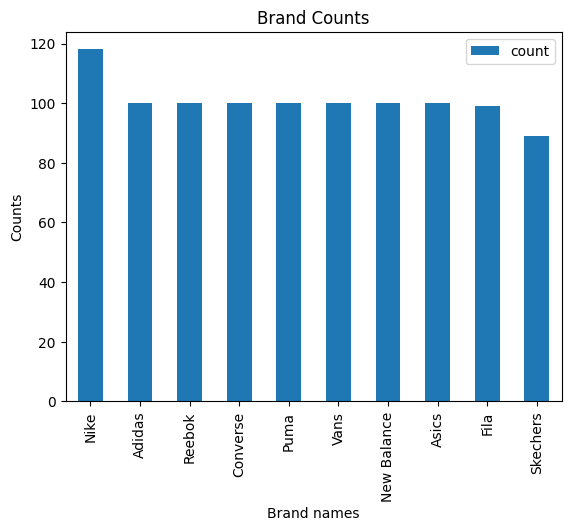

In [ ]:
shoes_dataset['Brand'].value_counts().plot(kind='bar', legend='false')

#ajouter des titres et des étiquettes aux axes du graphique à barres
plt.title('Brand Counts')
plt.xlabel('Brand names')
plt.ylabel('Counts')
plt.show()

In [ ]:
# Type
shoes_dataset['Type'] = shoes_dataset['Type'].str.lower()
#convertir les valeurs de la colonne 'Type' du DataFrame en minuscules à l'aide de la méthode str.lower().

In [ ]:
shoes_dataset['Type'].value_counts()
#compter le nombre d'occurrences de chaque valeur dans la colonne 'Type' du DataFrame 

Type
running           332
casual            243
skate             100
fashion            86
lifestyle          76
basketball         52
walking            46
training           34
crossfit           14
trail               6
weightlifting       4
trail running       3
slides              3
retro               3
hiking              2
cross-training      1
racing              1
Name: count, dtype: int64

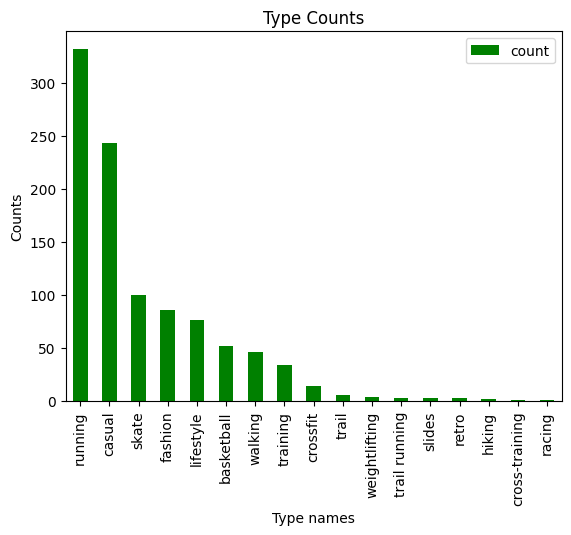

In [ ]:
shoes_dataset['Type'].value_counts().plot(kind='bar', legend='false', color = 'green')
plt.title('Type Counts')
plt.xlabel('Type names')
plt.ylabel('Counts')
plt.show()
#ce code est pour crée un graphique à barres qui montre la distribution des différents types de chaussures dans les données.

In [ ]:
def add_type(inpt):
    if inpt=='casual' or inpt=='fashion' or inpt=='lifestyle' or inpt=='slides' or inpt=='retro' :
        return inpt
    else :
        return 'sport'
shoes_dataset['Type'] = shoes_dataset['Type'].apply(add_type)

# Cette fonction add_type prend en entrée une valeur de la colonne 'Type' et retourne la même valeur si elle correspond à l'une des catégories spécifiées 
# ('casual', 'fashion', 'lifestyle', 'slides', 'retro'), sinon elle retourne 'sport'. Ensuite, la méthode apply() est utilisée pour appliquer cette fonction 
# à chaque élément de la colonne 'Type'

In [ ]:
shoes_dataset['Type'].value_counts()
#Pour voir la mise à jour effectuée après le regroupement des catégories

Type
sport        595
casual       243
fashion       86
lifestyle     76
slides         3
retro          3
Name: count, dtype: int64

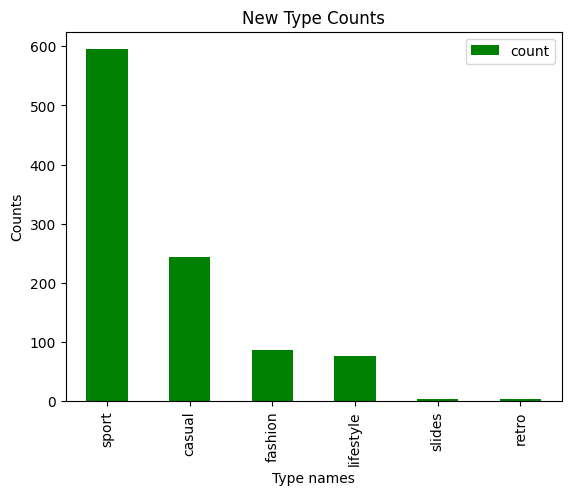

In [ ]:
shoes_dataset['Type'].value_counts().plot(kind='bar', legend='false', color = 'green')
plt.title('New Type Counts')
plt.xlabel('Type names')
plt.ylabel('Counts')
plt.show()

#Creer un graphique à barres qui montre la distribution des différents types de chaussures dans les données.

In [ ]:
## Gender
shoes_dataset['Gender'].value_counts()

Gender
Men      535
Women    471
Name: count, dtype: int64

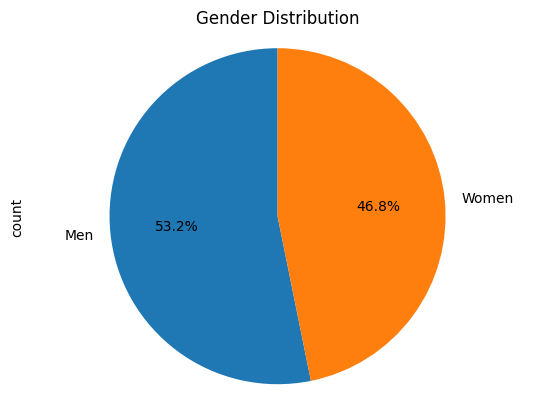

In [ ]:
shoes_dataset['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle = 90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()
#Ce code génère un diagramme circulaire pour visualiser la répartition des valeurs de la colonne 'Gender' du DataFrame 

In [ ]:
## Size
shoes_dataset['Size'] = shoes_dataset['Size'].str.replace('US','')
#Cette ligne de code supprime la chaîne de caractères 'US' de chaque valeur de la colonne 'Size' .

In [ ]:
shoes_dataset.head()

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Air Jordan 1,sport,Men,10,Red/Black,Leather,$170.00
1,Adidas,Ultra Boost 21,sport,Men,9.5,Black,Primeknit,$180.00
2,Reebok,Classic Leather,casual,Men,11,White,Leather,$75.00
3,Converse,Chuck Taylor,casual,Women,8,Navy,Canvas,$55.00
4,Puma,Future Rider,lifestyle,Women,7.5,Pink,Mesh,$80.00


In [ ]:
shoes_dataset['Size'] = shoes_dataset['Size'].astype(float)
#changer le type des valeurs de la colonne 'Size' en type de données (float). 

In [ ]:
shoes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        1006 non-null   object 
 1   Model        1006 non-null   object 
 2   Type         1006 non-null   object 
 3   Gender       1006 non-null   object 
 4   Size         1006 non-null   float64
 5   Color        1006 non-null   object 
 6   Material     1006 non-null   object 
 7   Price (USD)  1006 non-null   object 
dtypes: float64(1), object(7)
memory usage: 63.0+ KB


In [ ]:
## Color
shoes_dataset['Color'] = shoes_dataset['Color'].str.lower()

In [ ]:
shoes_dataset['Color'].value_counts()

Color
black              178
white              139
grey               101
black/white        100
pink                64
                  ... 
khaki                1
black/blue           1
grey/purple          1
yellow/black         1
collegiate navy      1
Name: count, Length: 82, dtype: int64

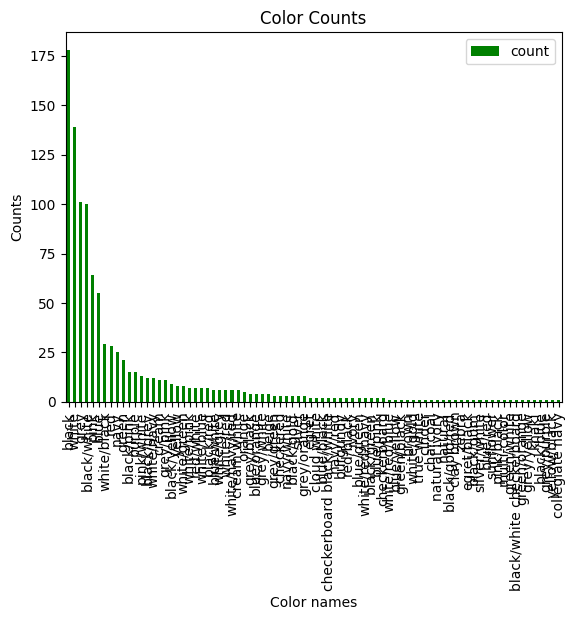

In [ ]:
shoes_dataset['Color'].value_counts().plot(kind='bar', legend='false', color = 'green')
plt.title('Color Counts')
plt.xlabel('Color names')
plt.ylabel('Counts')
plt.show()

In [ ]:
def add_Color(inpt):
    if inpt=='black' or inpt=='white' or inpt=='grey' or inpt=='black/white' or inpt=='pink' :
        return inpt
    else :
        return 'other'
shoes_dataset['Color'] = shoes_dataset['Color'].apply(add_Color)

#Cette fonction `add_Color` recatégorise les valeurs de la colonne 'Color' du DataFrame `shoes_dataset` en cinq catégories principales :
# 'black', 'white', 'grey', 'black/white', 'pink' si elles correspondent à l'une de ces couleurs. Sinon, la fonction les renvoie comme 'other'.

In [ ]:
shoes_dataset['Color'].value_counts()

Color
other          424
black          178
white          139
grey           101
black/white    100
pink            64
Name: count, dtype: int64

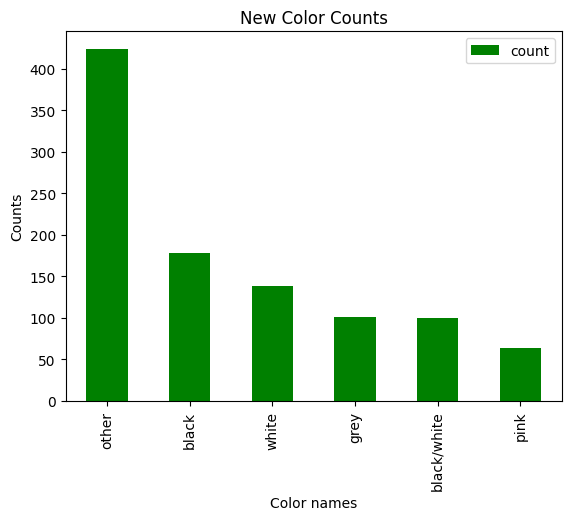

In [ ]:
shoes_dataset['Color'].value_counts().plot(kind='bar', legend='false', color = 'green')
plt.title('New Color Counts')
plt.xlabel('Color names')
plt.ylabel('Counts')
plt.show()

In [ ]:
## Material
shoes_dataset['Material'] = shoes_dataset['Material'].str.lower()

In [ ]:
shoes_dataset['Material'].value_counts()

Material
mesh                    308
leather                 168
canvas                  147
primeknit                68
leather/synthetic        47
synthetic                46
mesh/synthetic           36
suede/mesh               32
suede/canvas             29
suede                    19
flyknit                  17
knit                     15
nylon                    13
canvas/suede              9
synthetic/mesh            7
suede/leather             6
synthetic/leather         6
suede/nylon               5
flexweave                 4
leather/suede             3
nylon/suede               3
suede/textile             3
knit/synthetic            3
synthetic/textile         2
textile/leather           1
canvas/leather            1
flexweave/knit            1
mesh/leather              1
primeknit/synthetic       1
leather/mesh              1
textile                   1
flexweave/cushioning      1
flexweave/synthetic       1
mesh/suede                1
Name: count, dtype: int64

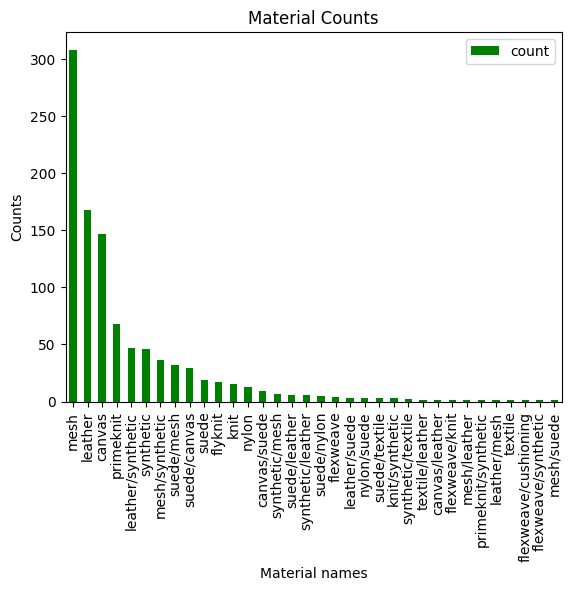

In [ ]:
shoes_dataset['Material'].value_counts().plot(kind='bar', legend='false', color = 'green')
plt.title('Material Counts')
plt.xlabel('Material names')
plt.ylabel('Counts')
plt.show()

In [ ]:
def add_Material(inpt):
    if inpt=='mech' or inpt=='leather' or inpt=='canvas' or inpt=='primeknit' or inpt=='synthetic' or inpt=='suede' or inpt=='knit' or inpt=='nylon' :
        return inpt
    else :
        return 'other'
shoes_dataset['Material'] = shoes_dataset['Material'].apply(add_Material)

In [ ]:
shoes_dataset['Material'].value_counts()

Material
other        530
leather      168
canvas       147
primeknit     68
synthetic     46
suede         19
knit          15
nylon         13
Name: count, dtype: int64

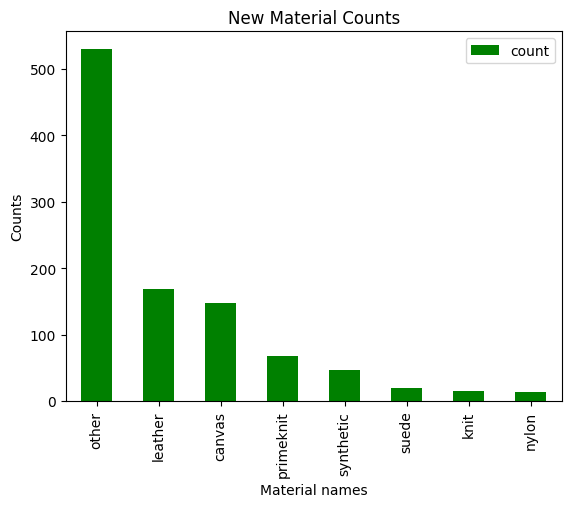

In [ ]:
shoes_dataset['Material'].value_counts().plot(kind='bar', legend='false', color = 'green')
plt.title('New Material Counts')
plt.xlabel('Material names')
plt.ylabel('Counts')
plt.show()

In [ ]:
## Price
shoes_dataset['Price (USD)'] = shoes_dataset['Price (USD)'].str.replace('$','').astype(float)
shoes_dataset.head(5)

#Cette section du code traite la colonne 'Price (USD)' du DataFrame `shoes_dataset`. Elle commence par retirer le symbole '$' de chaque valeur 
#de cette colonne à l'aide de la méthode 'str.replace('$','')', puis convertit les valeurs restantes en nombres décimaux à l'aide de 'astype(float)'. 
#Enfin, les cinq premières lignes du DataFrame modifié sont affichées pour vérification.

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Air Jordan 1,sport,Men,10.0,other,leather,170.0
1,Adidas,Ultra Boost 21,sport,Men,9.5,black,primeknit,180.0
2,Reebok,Classic Leather,casual,Men,11.0,white,leather,75.0
3,Converse,Chuck Taylor,casual,Women,8.0,other,canvas,55.0
4,Puma,Future Rider,lifestyle,Women,7.5,pink,other,80.0


<Axes: xlabel='Brand', ylabel='Price (USD)'>

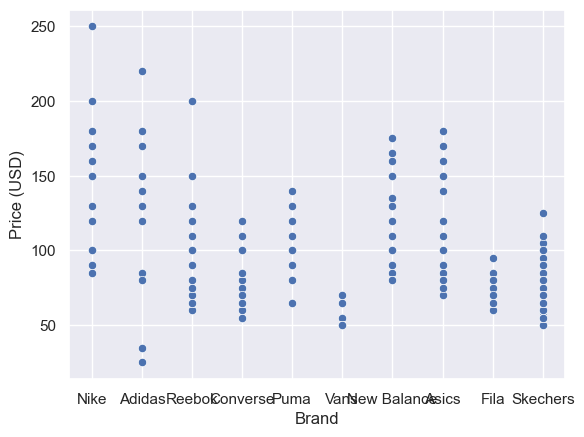

In [ ]:
sns.set()
sns.scatterplot(data=shoes_dataset, x="Brand", y="Price (USD)")
#Ce code utilise la bibliothèque Seaborn pour créer un nuage de points qui explore la relation entre la marque des chaussures ('Brand')
#et leur prix en dollars ('Price (USD)'). Chaque point dans le nuage de points représente une paire de chaussures, 
#affichant la marque sur l'axe horizontal (x) et le prix en dollars sur l'axe vertical (y).

In [ ]:
shoes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        1006 non-null   object 
 1   Model        1006 non-null   object 
 2   Type         1006 non-null   object 
 3   Gender       1006 non-null   object 
 4   Size         1006 non-null   float64
 5   Color        1006 non-null   object 
 6   Material     1006 non-null   object 
 7   Price (USD)  1006 non-null   float64
dtypes: float64(2), object(6)
memory usage: 63.0+ KB


In [ ]:
shoes_dataset = pd.get_dummies(shoes_dataset,dtype=int)
shoes_dataset.head(5)
shoes_dataset.info()

# transformer les variables catégorielles du DataFrame `shoes_dataset` en variables binaires (0 ou 1) avec la fonction `pd.get_dummies()`.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Columns: 273 entries, Size to Material_synthetic
dtypes: float64(2), int32(271)
memory usage: 1.1 MB


In [ ]:
x = shoes_dataset.drop('Price (USD)', axis=1)
x
#Ce code crée une nouvelle variable `x` qui contient toutes les colonnes du DataFrame `shoes_dataset` à l'exception de la colonne 'Price (USD)'.

,Size,Brand_Adidas,Brand_Asics,Brand_Converse,Brand_Fila,Brand_New Balance,Brand_Nike,Brand_Puma,Brand_Reebok,Brand_Skechers,...,Color_pink,Color_white,Material_canvas,Material_knit,Material_leather,Material_nylon,Material_other,Material_primeknit,Material_suede,Material_synthetic
0,10.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,9.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,11.0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,8.0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,7.5,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,10.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1002,9.5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1003,7.5,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1004,8.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
y = shoes_dataset['Price (USD)']
y
# Cette ligne de code extrait la colonne 'Price (USD)' du jeu de données et la stocke dans la variable `y`,
# qui représente la variable cible que nous voulons prédire ou expliquer.

0       170.0
1       180.0
2        75.0
3        55.0
4        80.0
        ...  
1001    130.0
1002    160.0
1003     70.0
1004     55.0
1005    170.0
Name: Price (USD), Length: 1006, dtype: float64